In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
# Load dataset
digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

print("n_digits: %d\nn_samples: %d\nn_features: %d" % (n_digits, n_samples, n_features))

n_digits: 10
n_samples: 1797
n_features: 64


K-means inertia: 70804.42783599469


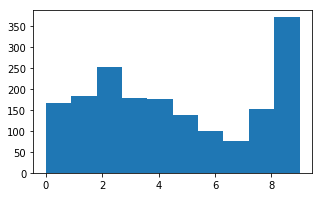

In [3]:
# Use PCA to reduce number of dimension from 64 to nb of digits (10) before run a K-means
pca = PCA(n_components=n_digits).fit(data)

# Configure and fit K-means to data with pca components as init
km = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1).fit(data)

#Print inertie and plot label occupency:
print("K-means inertia: " + str(km.inertia_))
labels = km.labels_
clusters = km.cluster_centers_
plt.rcParams['figure.figsize'] = [5, 3]
plt.hist(labels,bins=n_digits);

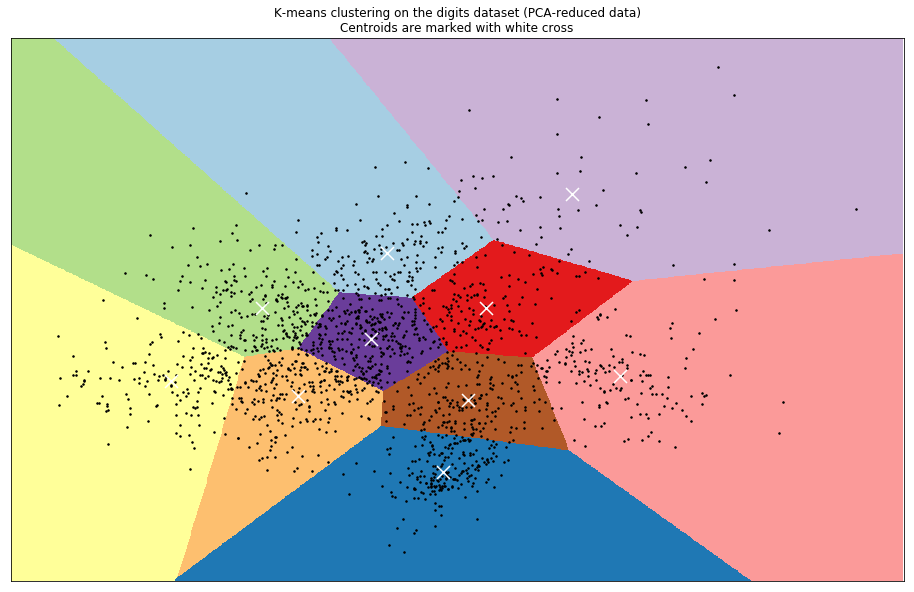

In [4]:
# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components=2).fit_transform(data)

# fir kmeans to the reduced dataset
km = KMeans(init='k-means++', n_clusters=n_digits, n_init=10).fit(reduced_data)

# Plot the Voronoi graph
plt.rcParams['figure.figsize'] = [16, 10]
h = .02

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=3)
# Plot the centroids as a white X
centroids = km.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=5,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()